In [14]:
import os
import pandas as pd
import numpy as np

# 设置字体为黑体，并解决负号显示问题
import matplotlib
from pyarrow import show_info
from sklearn.linear_model import LinearRegression

matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['axes.unicode_minus'] = False

# 定义文件夹路径
info_folder = 'StockData/market_info'
data_folder = 'StockData/market_data'

# 创建字典存储股票相关信息数据
market_info = {}
# 读取 market_info 中的文件
for year in range(2014, 2025):
    file_name = f'hs300stocks_{year}.csv'
    file_path = os.path.join(info_folder, file_name)
    if os.path.isfile(file_path):
        data = pd.read_csv(file_path)
        market_info[f'year_{year}'] = data
    else:
        print(f'Warning: File {file_path} does not exist.')

# 创建字典存储股票具体数据
market_data = {}
# 读取 market_data 中的文件
for year in range(2014, 2025):
    file_name = f'hs300stocks_kdata_{year}.csv'
    file_path = os.path.join(data_folder, file_name)
    if os.path.isfile(file_path):
        data = pd.read_csv(file_path)
        market_data[f'year_{year}'] = data
    else:
        print(f'Warning: File {file_path} does not exist.')

# 合并所有年份的市场数据为一个数据框
combined_market_data = pd.concat(market_data.values(), ignore_index=True)

# 假设 combined_market_data 包含 'time' 和 'close' 列
combined_market_data['time'] = pd.to_datetime(combined_market_data['time'], format='%Y/%m/%d %H:%M', errors='coerce')
combined_market_data.sort_values('time', inplace=True)

# 计算日收益率
combined_market_data['returns'] = combined_market_data['close'].pct_change()

# 定义函数计算风险指标
def calculate_risk_metrics(data):
    # 去除缺失值
    data = data.dropna(subset=['returns'])

    # 检查是否有足够的收益率数据
    if len(data) < 1:
        raise ValueError("收益率数据不足，无法计算风险指标。")

    # 计算夏普比率
    sharpe_ratio = np.mean(data['returns']) / np.std(data['returns'])

    # 计算最大回撤
    cumulative_returns = (1 + data['returns']).cumprod()
    max_drawdown = np.log((cumulative_returns / cumulative_returns.cummax()).min())

    # 计算CoVaR（假设市场条件下的VaR为95%）
    var_threshold = np.percentile(data['returns'], 5)
    conditional_returns = data[data['returns'] <= var_threshold]

    if conditional_returns.empty:
        raise ValueError("没有满足条件的收益率数据，无法计算CoVaR和MES。")

    cvar = conditional_returns['returns'].mean()
    mes = conditional_returns['returns'].mean()

    # 计算SRISK（假设损失为VaR的负值）
    srisk = max(0, -var_threshold)

    # 计算CES（假设为条件下的期望损失）
    ces = conditional_returns['returns'].mean()

    return {
        'Sharpe Ratio': sharpe_ratio,
        'Maximum Drawdown': max_drawdown,
        'CoVaR': cvar,
        'MES': mes,
        'SRISK': srisk,
        'CES': ces
    }

# 计算风险指标
try:
    risk_metrics = calculate_risk_metrics(combined_market_data)
except ValueError as e:
    print(e)
    risk_metrics = {key: np.nan for key in ['Sharpe Ratio', 'Maximum Drawdown', 'CoVaR', 'MES', 'SRISK', 'CES']}

# 将结果保存到新的CSV文件
risk_metrics_df = pd.DataFrame(risk_metrics, index=[0])
output_file_path = 'StockData/risk_metrics_2014_2024.csv'
risk_metrics_df.to_csv(output_file_path, index=False)

print(f'风险指标已保存至 {output_file_path}')

风险指标已保存至 StockData/risk_metrics_2014_2024.csv


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib
from pyarrow import show_info
from sklearn.linear_model import LinearRegression

# 设置字体为黑体，并解决负号显示问题
matplotlib.rcParams['font.family'] = 'SimHei'
matplotlib.rcParams['axes.unicode_minus'] = False

# 定义文件夹路径
info_folder = 'StockData/market_info'
data_folder = 'StockData/market_data'

# 创建字典存储股票相关信息数据
market_info = {}
# 读取 market_info 中的文件
for year in range(2014, 2025):
    file_name = f'hs300stocks_{year}.csv'
    file_path = os.path.join(info_folder, file_name)
    if os.path.isfile(file_path):
        data = pd.read_csv(file_path)
        market_info[f'year_{year}'] = data
    else:
        print(f'Warning: File {file_path} does not exist.')

# 创建字典存储股票具体数据
market_data = {}
# 读取 market_data 中的文件
for year in range(2014, 2025):
    file_name = f'hs300stocks_kdata_{year}.csv'
    file_path = os.path.join(data_folder, file_name)
    if os.path.isfile(file_path):
        data = pd.read_csv(file_path)
        market_data[f'year_{year}'] = data
    else:
        print(f'Warning: File {file_path} does not exist.')

# 合并所有年份的市场数据为一个数据框
combined_market_data = pd.concat(market_data.values(), ignore_index=True)

# 假设 combined_market_data 包含 'time' 和 'close' 列
combined_market_data['time'] = pd.to_datetime(combined_market_data['time'], format='%Y/%m/%d %H:%M', errors='coerce')
combined_market_data.sort_values('time', inplace=True)

# 计算日收益率
combined_market_data['returns'] = combined_market_data['close'].pct_change()

# 定义函数计算风险指标
def calculate_risk_metrics(data):
    # 去除缺失值
    data = data.dropna(subset=['returns'])

    # 检查是否有足够的收益率数据
    if len(data) < 1:
        raise ValueError("收益率数据不足，无法计算风险指标。")

    # 计算夏普比率
    sharpe_ratio = np.mean(data['returns']) / np.std(data['returns'])

    # 计算最大回撤
    cumulative_returns = (1 + data['returns']).cumprod()
    max_drawdown = np.log((cumulative_returns / cumulative_returns.cummax()).min())

    # 计算CoVaR（假设市场条件下的VaR为95%）
    var_threshold = np.percentile(data['returns'], 5)
    conditional_returns = data[data['returns'] <= var_threshold]

    if conditional_returns.empty:
        raise ValueError("没有满足条件的收益率数据，无法计算CoVaR和MES。")

    cvar = conditional_returns['returns'].mean()
    mes = conditional_returns['returns'].mean()

    # 计算SRISK（假设损失为VaR的负值）
    srisk = max(0, -var_threshold)

    # 计算CES（假设为条件下的期望损失）
    ces = conditional_returns['returns'].mean()

    return {
        'Sharpe Ratio': sharpe_ratio,
        'Maximum Drawdown': max_drawdown,
        'CoVaR': cvar,
        'MES': mes,
        'SRISK': srisk,
        'CES': ces
    }

# 计算风险指标
try:
    risk_metrics = calculate_risk_metrics(combined_market_data)
except ValueError as e:
    print(e)
    risk_metrics = {key: np.nan for key in ['Sharpe Ratio', 'Maximum Drawdown', 'CoVaR', 'MES', 'SRISK', 'CES']}

# 将风险指标转换为DataFrame
risk_metrics_df = pd.DataFrame(risk_metrics, index=[0])

# Z-score 标准化处理
def z_score_standardize(df):
    return (df - df.mean()) / df.std()

# 对所有风险指标进行Z-score标准化
risk_metrics_standardized = z_score_standardize(risk_metrics_df)

# 将标准化后的结果保存到新的CSV文件
output_file_path = 'StockData/risk_metrics_standardized_2014_2024.csv'
risk_metrics_standardized.to_csv(output_file_path, index=False)

print(f'标准化后的风险指标已保存至 {output_file_path}')

标准化后的风险指标已保存至 StockData/risk_metrics_standardized_2014_2024.csv


In [17]:
print(risk_metrics)

{'Sharpe Ratio': 0.04706098362197889, 'Maximum Drawdown': -7.454372836107216, 'CoVaR': -0.4920607522896791, 'MES': -0.4920607522896791, 'SRISK': 0.07092865000168366, 'CES': -0.4920607522896791}


D:\Anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


所有沪深300个股的风险指标已保存至 StockData/hs300_risk_metrics_2014_2024.xlsx


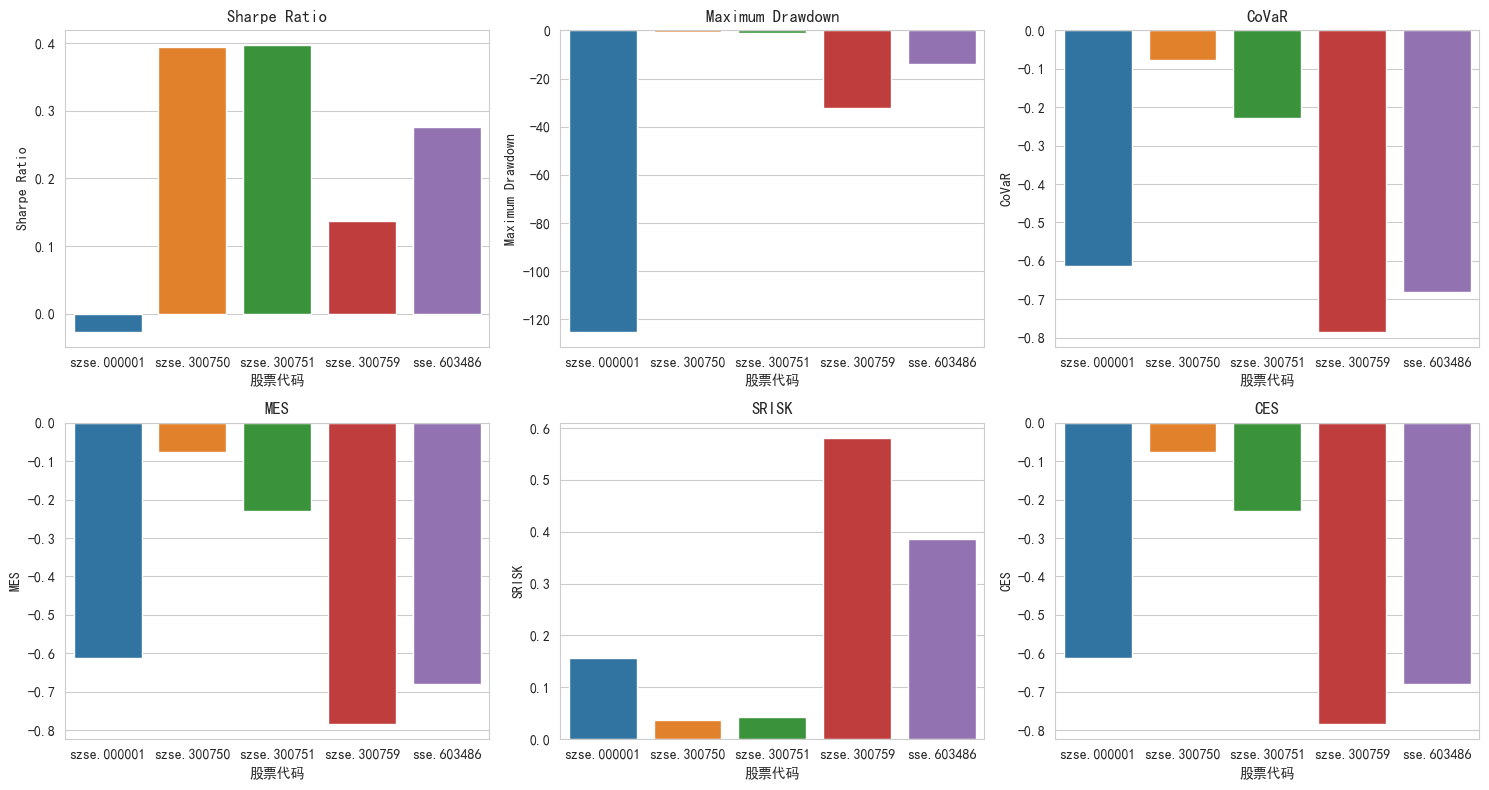

所有沪深300个股的风险指标已保存至 StockData/hs300_risk_metrics_2014_2024.xlsx


In [4]:
import matplotlib
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 忽略 FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 设置matplotlib支持中文显示
matplotlib.rcParams['font.family'] = 'SimHei'  # 设置字体为黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 正确显示负号

# 初始化存储风险指标的列表
all_risk_metrics_list = []

# 获取所有唯一的股票代码
unique_stock_codes = combined_market_data['code'].unique()

# 针对每只股票汇总数据后再计算风险指标
for stock_code in unique_stock_codes:
    # 获取该股票的全部数据（跨越2014-2024年）
    stock_data = combined_market_data[combined_market_data['code'] == stock_code]
    
    try:
        # 计算风险指标
        metrics = calculate_risk_metrics(stock_data)
        metrics['Stock Code'] = stock_code
        all_risk_metrics_list.append(metrics)
    except ValueError as e:
        print(f'{stock_code}: {e}')

# 转换为 DataFrame
all_risk_metrics_df = pd.DataFrame(all_risk_metrics_list)

# 将所有股票的风险指标保存为Excel文件
output_file_path = 'StockData/hs300_risk_metrics_2014_2024.xlsx'
all_risk_metrics_df.to_excel(output_file_path, index=False)

print(f'所有沪深300个股的风险指标已保存至 {output_file_path}')

# 选择前5只股票进行可视化
top5_stocks = all_risk_metrics_df['Stock Code'].unique()[:5]
top5_risk_metrics_df = all_risk_metrics_df[all_risk_metrics_df['Stock Code'].isin(top5_stocks)]

# 可视化风险指标
plt.figure(figsize=(15, 8))

# 绘制每个指标的柱状图
metrics = ['Sharpe Ratio', 'Maximum Drawdown', 'CoVaR', 'MES', 'SRISK', 'CES']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Stock Code', y=metric, data=top5_risk_metrics_df)
    plt.title(metric)
    plt.xlabel('股票代码')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

print(f'所有沪深300个股的风险指标已保存至 {output_file_path}')

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# 选择用于灵敏度分析的风险指标数据
risk_metrics = all_risk_metrics_df.set_index('Stock Code')
risk_metrics = risk_metrics.apply(pd.to_numeric, errors='coerce')  # 确保数据为数值类型

# 去除缺失值
risk_metrics = risk_metrics.dropna()
print(risk_metrics)

             Sharpe Ratio  Maximum Drawdown     CoVaR       MES     SRISK  \
Stock Code                                                                  
szse.000001     -0.027695       -125.042811 -0.613486 -0.613486  0.155856   
szse.300750      0.394305         -0.582529 -0.076990 -0.076990  0.037884   
szse.300751      0.397828         -1.041644 -0.228380 -0.228380  0.042691   
szse.300759      0.137383        -32.382000 -0.784587 -0.784587  0.581002   
sse.603486       0.275447        -14.016523 -0.681251 -0.681251  0.386612   
...                   ...               ...       ...       ...       ...   
szse.300207     -0.076810         -0.561085 -0.044975 -0.044975  0.034049   
szse.300769      0.017368         -1.144791 -0.061221 -0.061221  0.041693   
sse.600884      -0.083665         -0.465578 -0.072787 -0.072787  0.024481   
sse.603185       0.008283         -0.998082 -0.039720 -0.039720  0.031733   
sse.688005      -0.104682         -0.801320 -0.079249 -0.079249  0.031039   


回归结果 - 因变量：Sharpe Ratio
                            OLS Regression Results                            
Dep. Variable:           Sharpe Ratio   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.514
Method:                 Least Squares   F-statistic:                     234.1
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          2.74e-103
Time:                        19:18:54   Log-Likelihood:                 382.20
No. Observations:                 661   AIC:                            -756.4
Df Residuals:                     657   BIC:                            -738.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0284      

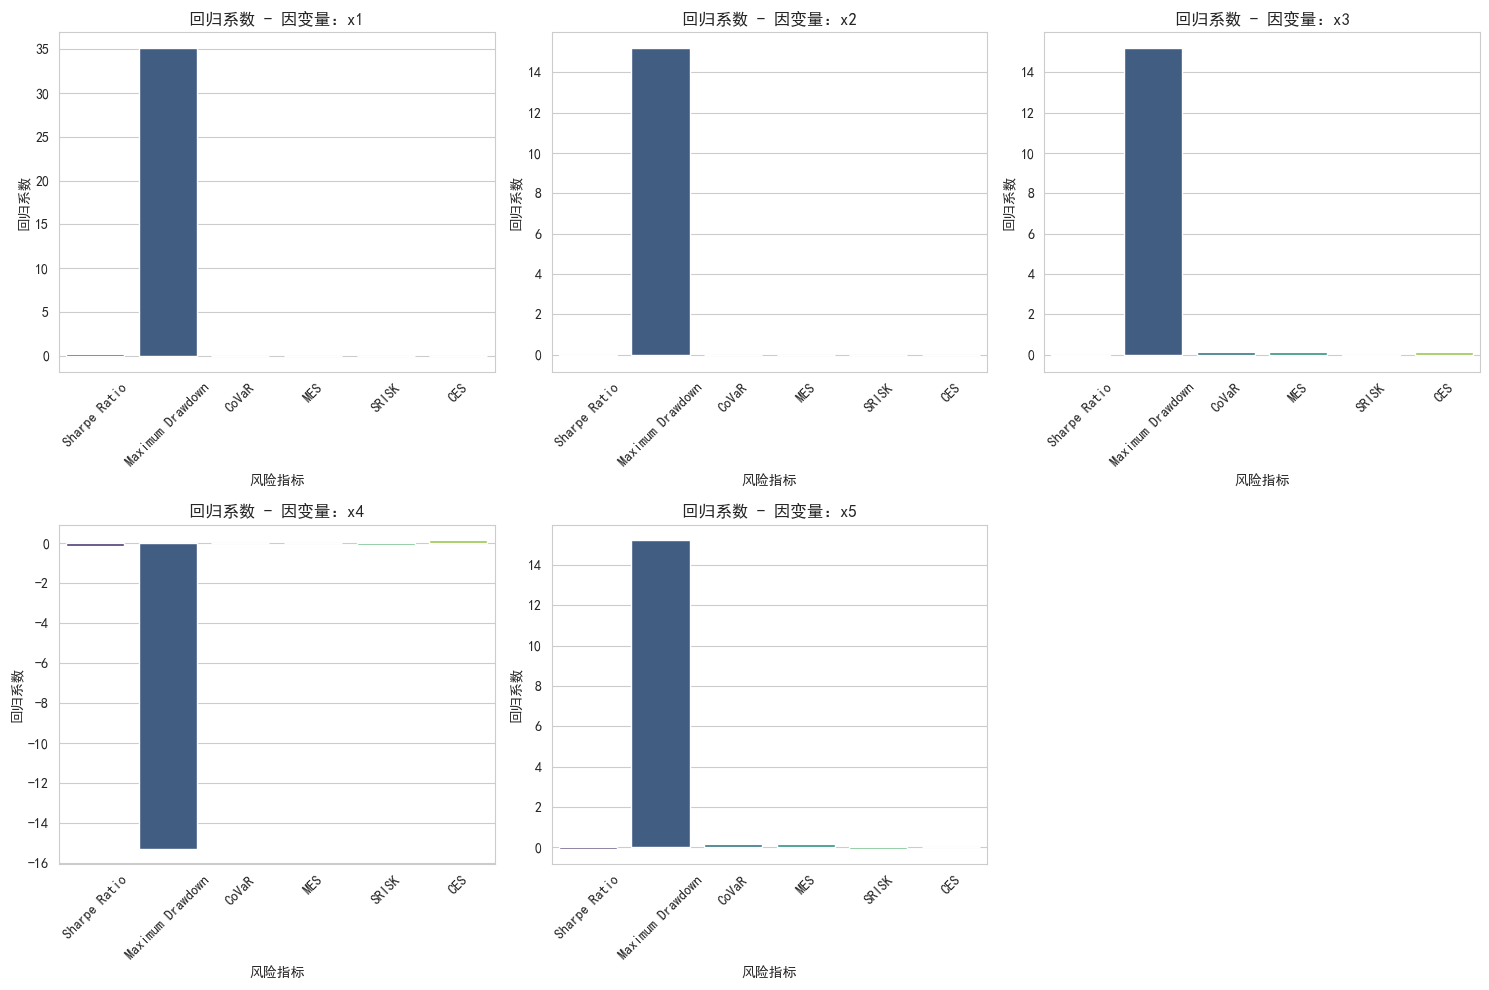

In [11]:
# 定义因变量和自变量
X = risk_metrics.drop('SRISK', axis=1)  # 将SRISK作为因变量
y = risk_metrics['SRISK']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 添加常数项
X_scaled = sm.add_constant(X_scaled)

# 拟合回归模型
model = sm.OLS(y, X_scaled).fit()

# 输出回归结果
print(model.summary())

# 提取回归系数
coefficients = model.params
print("\n回归系数:")
print(coefficients)

# 可视化回归系数（灵敏度分析）
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, palette="viridis")
plt.title('系统性风险指标灵敏度分析（回归系数）')
plt.xlabel('风险指标')
plt.ylabel('回归系数')
plt.xticks(rotation=90)
plt.show()

D:\Anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.06081. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      7,   Neg. LLF: 1199056750655.572
Iteration:      2,   Func. Count:     20,   Neg. LLF: 180040027335.36496
Iteration:      3,   Func. Count:     32,   Neg. LLF: 59231955480018.16
Iteration:      4,   Func. Count:     43,   Neg. LLF: 2295040314014248.0
Iteration:      5,   Func. Count:     55,   Neg. LLF: 7.698302787617722e+16
Iteration:      6,   Func. Count:     68,   Neg. LLF: 3.0942389533285663e+18
Iteration:      7,   Func. Count:     82,   Neg. LLF: 326031524544811.75
Iteration:      8,   Func. Count:     96,   Neg. LLF: 8.876462539138936e+19
Iteration:      9,   Func. Count:    110,   Neg. LLF: 5543483093930.549
Iteration:     10,   Func. Count:    120,   Neg. LLF: 6786657586939.202
Iteration:     11,   Func. Count:    133,   Neg. LLF: 520922938.1534354
Iteration:     12,   Func. Count:    142,   Neg. LLF: 127.16038833702646
Iteration:     13,   Func. Count:    149,   Neg. LLF: -789.6775488443993
Iteration:     14,   Func. Count:    155,   Ne

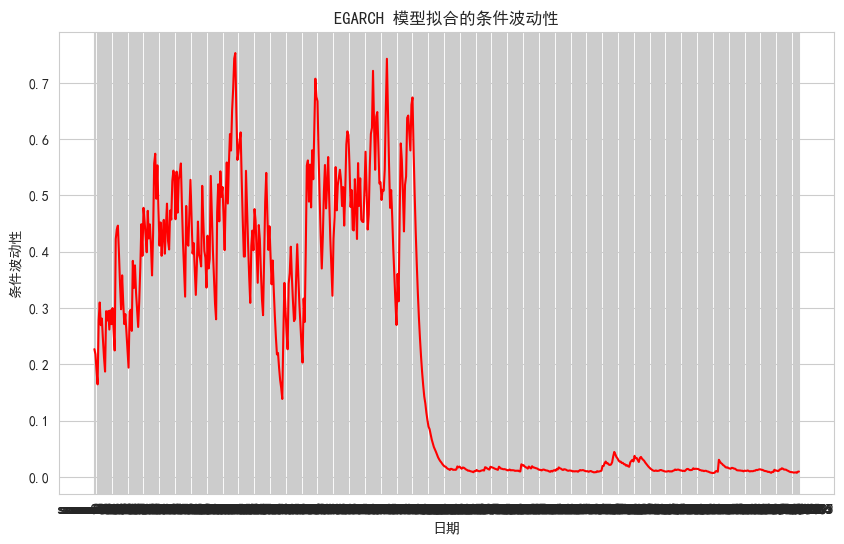

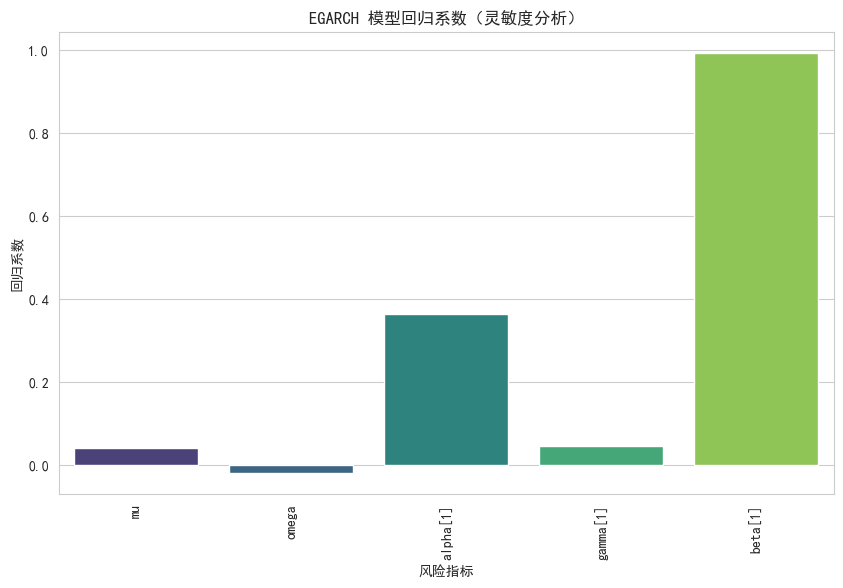

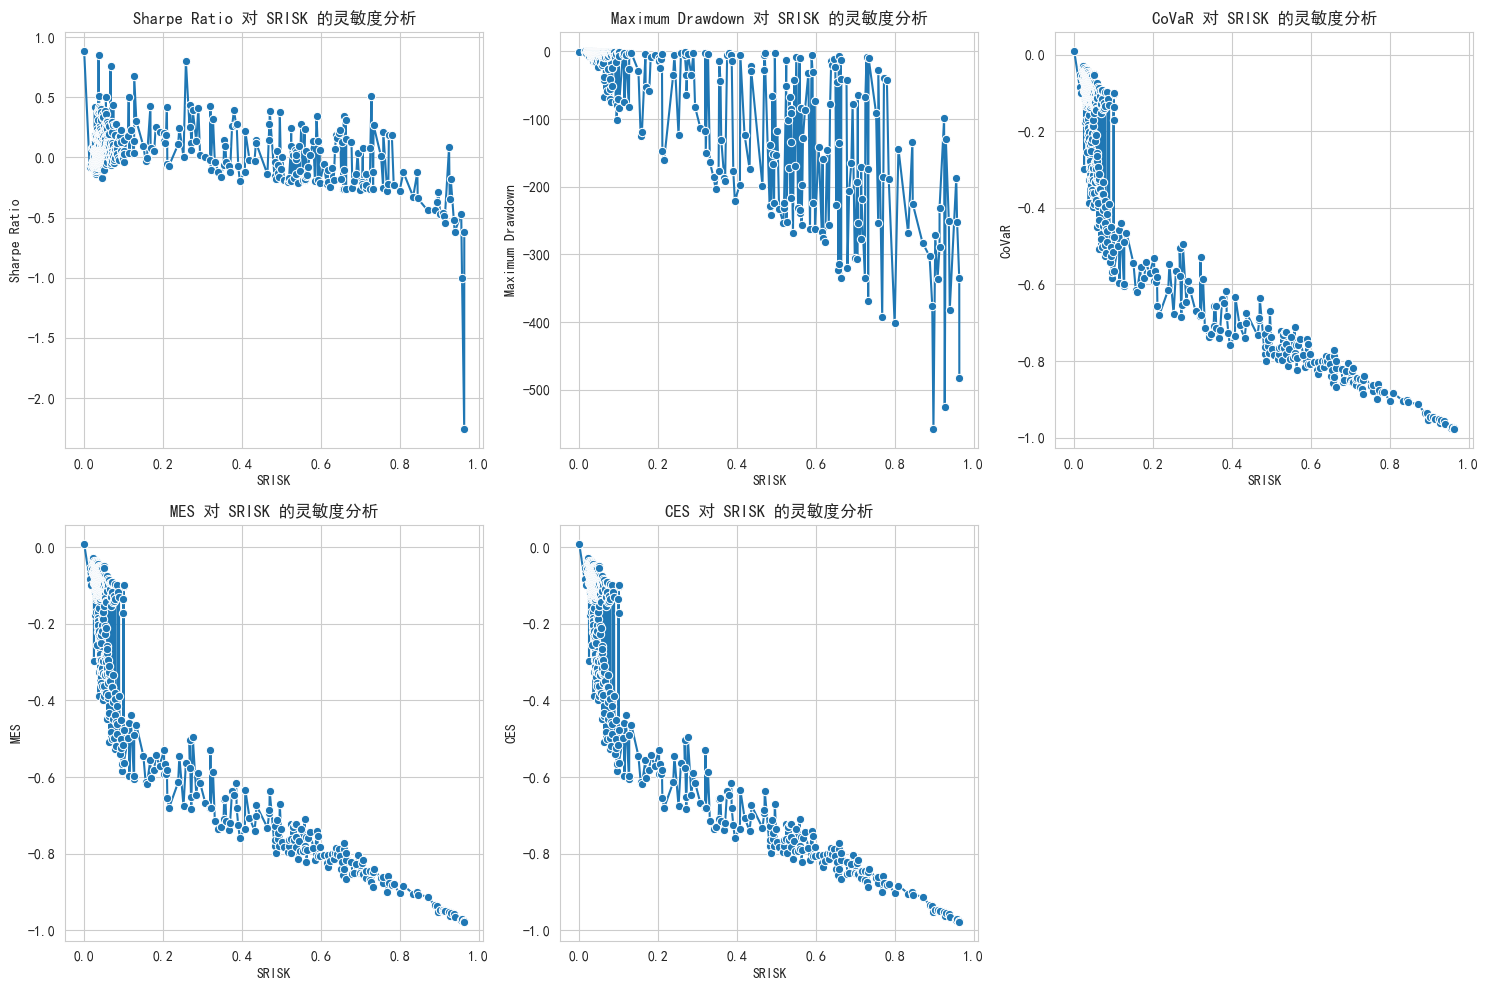

In [15]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from arch import arch_model
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 all_risk_metrics_df 已经包含了风险指标数据
risk_metrics = all_risk_metrics_df.set_index('Stock Code')
risk_metrics = risk_metrics.apply(pd.to_numeric, errors='coerce')  # 确保数据为数值类型

# 去除缺失值
risk_metrics = risk_metrics.dropna()

# 定义因变量和自变量
X = risk_metrics.drop('SRISK', axis=1)  # 将SRISK作为因变量
y = risk_metrics['SRISK']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 使用标准化后的数据拟合EGARCH模型
# 假设我们选择拟合自变量 X_scaled 和因变量 SRISK 的波动性

# 设置自变量的波动性模型
model = arch_model(y, vol='EGARCH', p=1, o=1, q=1)  # p, o, q 是 EGARCH 模型的参数，分别是AR, GARCH 和异方差项
egarch_fit = model.fit()

# 输出EGARCH模型拟合结果
print(egarch_fit.summary())

# 提取并显示EGARCH模型的回归系数（包括波动性系数）
print("\nEGARCH 模型的系数：")
print(egarch_fit.params)

# 可视化拟合结果（例如波动性的拟合曲线）
plt.figure(figsize=(10, 6))
sns.lineplot(x=egarch_fit.conditional_volatility.index, y=egarch_fit.conditional_volatility.values, color='r')
plt.title('EGARCH 模型拟合的条件波动性')
plt.xlabel('日期')
plt.ylabel('条件波动性')
plt.show()

# 可视化回归系数（灵敏度分析）
# 通过回归系数与原始指标值的关系，分析每个风险指标对波动性的影响
plt.figure(figsize=(10, 6))
sns.barplot(x=egarch_fit.params.index, y=egarch_fit.params.values, palette="viridis")
plt.title('EGARCH 模型回归系数（灵敏度分析）')
plt.xlabel('风险指标')
plt.ylabel('回归系数')
plt.xticks(rotation=90)
plt.show()

# 绘制每个指标与SRISK的关系，查看波动性（EGARCH拟合的波动性）如何影响SRISK
plt.figure(figsize=(15, 10))

# 绘制每个指标与SRISK的关系
for i, metric in enumerate(X.columns, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x=risk_metrics['SRISK'], y=risk_metrics[metric], marker='o')
    plt.title(f'{metric} 对 SRISK 的灵敏度分析')
    plt.xlabel('SRISK')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                  SRISK   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1548.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          2.64e-297
Time:                        19:23:31   Log-Likelihood:                 677.53
No. Observations:                 661   AIC:                            -1347.
Df Residuals:                     657   BIC:                            -1329.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1772      0.003     52.310      0.0

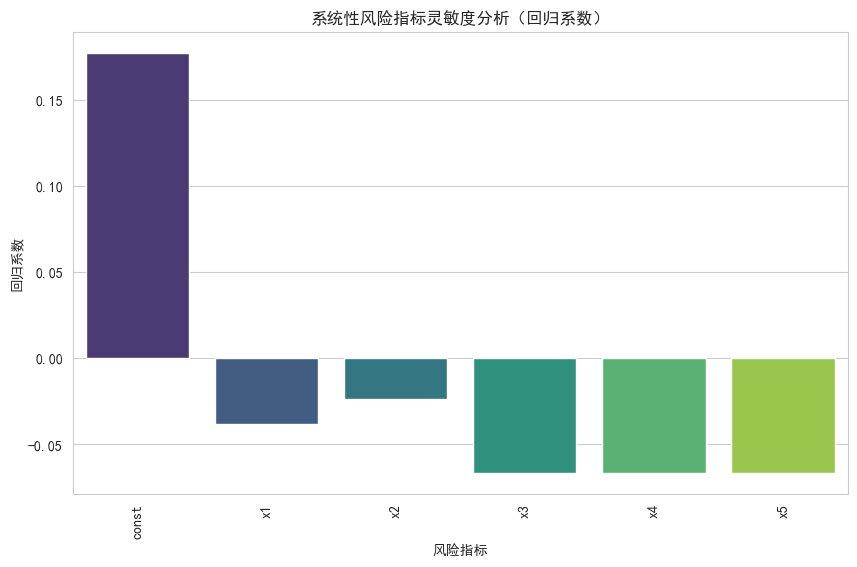

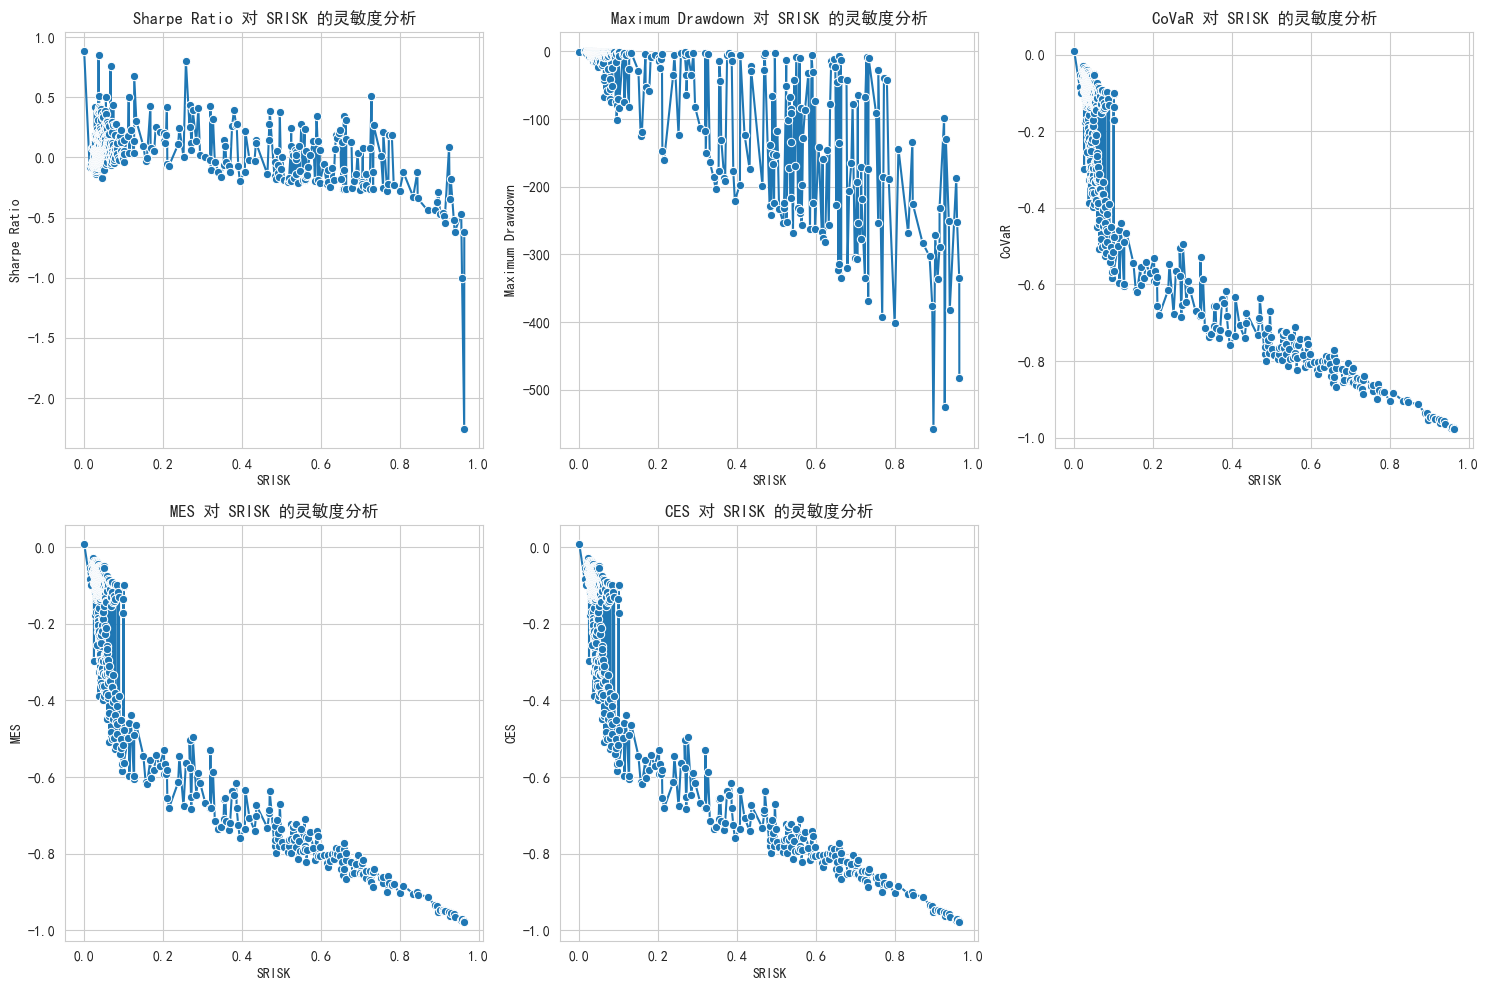

In [12]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# 选择用于灵敏度分析的风险指标数据
risk_metrics = all_risk_metrics_df.set_index('Stock Code')
risk_metrics = risk_metrics.apply(pd.to_numeric, errors='coerce')  # 确保数据为数值类型

# 去除缺失值
risk_metrics = risk_metrics.dropna()

# 定义因变量和自变量
X = risk_metrics.drop('SRISK', axis=1)  # 将SRISK作为因变量
y = risk_metrics['SRISK']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 添加常数项
X_scaled = sm.add_constant(X_scaled)

# 拟合回归模型
model = sm.OLS(y, X_scaled).fit()

# 输出回归结果
print(model.summary())

# 提取回归系数
coefficients = model.params
print("\n回归系数:")
print(coefficients)

# 可视化回归系数（灵敏度分析）
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, palette="viridis")
plt.title('系统性风险指标灵敏度分析（回归系数）')
plt.xlabel('风险指标')
plt.ylabel('回归系数')
plt.xticks(rotation=90)
plt.show()

# 计算每个风险指标对 SRISK 的灵敏度
# 通过回归系数和原始指标值，分析每个指标的灵敏度
plt.figure(figsize=(15, 10))

# 绘制每个指标与SRISK的关系
for i, metric in enumerate(X.columns, 1):
    plt.subplot(2, 3, i)
    sns.lineplot(x=risk_metrics['SRISK'], y=risk_metrics[metric], marker='o')
    plt.title(f'{metric} 对 SRISK 的灵敏度分析')
    plt.xlabel('SRISK')
    plt.ylabel(metric)

plt.tight_layout()
plt.show()